In [48]:
# %uv pip install pyhrv==0.4.1
# %uv pip install biosppy
# %uv pip install matplotlib
# %uv pip install numpy
# %uv pip install scipy
# %uv pip install nolds
# uv pip install spectrum
# uv pip install OpenSignalsReader
# uv pip install pandas

In [49]:
import pyhrv.tools as tools
import biosppy
import numpy as np
import pyhrv.tools as tools
from opensignalsreader import OpenSignalsReader

# Load sample ECG signal & extract R-peaks using BioSppy
import pandas as pd

In [50]:
zai_times = pd.read_csv('data/ECGzai_1107_goto_timestamps_20241107_152119.csv', names=['time'])
zai_data = pd.read_csv('data/ECGzai_1107_goto_data_20241107_152118.csv', names=['values'])
signal_ecg = pd.concat([zai_times, zai_data], axis=1)
signal_ecg.head()

,time,values
0,0.000,-0.032328
1,0.001,-0.035198
2,0.002,-0.034879
3,0.003,-0.032009
4,0.004,-0.033285


In [ ]:
ritui = pd.read_csv("data/ECGritsui_1107_goto_data_20241107_152116.csv")
ritui.head()

,0.048973
0,0.048973
1,0.048335
2,0.051523
3,0.051523
4,0.041321


: 

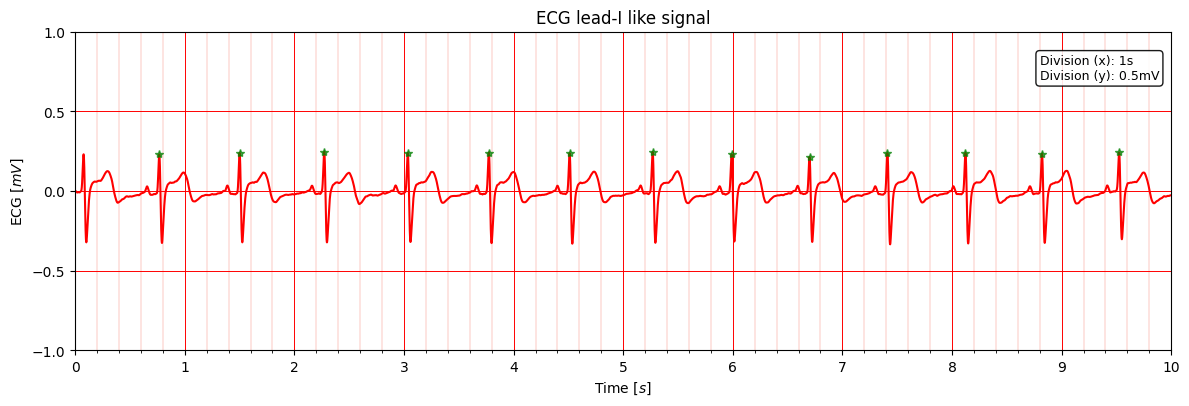

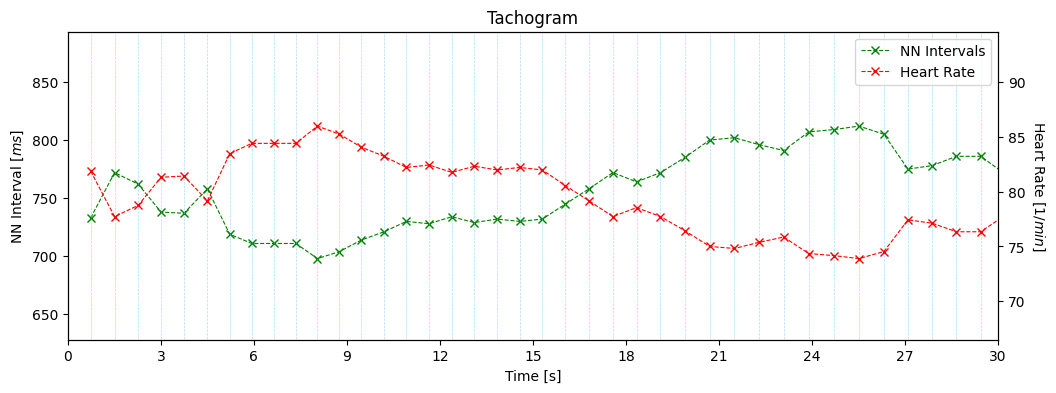

ReturnTuple(tachogram_plot=<Figure size 1200x400 with 2 Axes>)

In [51]:

# signal_ecg = pd.read_csv('./ansei.csv', skiprows=None, header=None)
t, signal, rpeaks = biosppy.signals.ecg.ecg(signal=signal_ecg['values'], sampling_rate=1000, show=False, interactive=False)[:3]
signal = (signal/1000)*1000 #ゲインで1000倍（1mv/V）しているため1000で割る（V)→ 1000倍して mVに

# Plot the ECG signal (interval: 0s to 10s)
tools.plot_ecg(signal, sampling_rate=1000, interval=[0, 10])

# Compute NNI(=RRI)
nni = tools.nn_intervals(rpeaks=t[rpeaks])

# Plot the Tachogram of the ECG signal (interval: 0s to 30s)
tools.tachogram(nni=nni, sampling_rate=1000, interval=[0, 30])

#print(nni)

In [52]:
# Import packages
import numpy as np
import pyhrv
import pyhrv.time_domain as td

# Load NNI sample series
nni = pyhrv.utils.load_sample_nni()

# Compute SDNN
result = td.sdnn(nni)

# Access SDNN value using the key 'sdnn'
print(result['sdnn'])

95.69035398754954


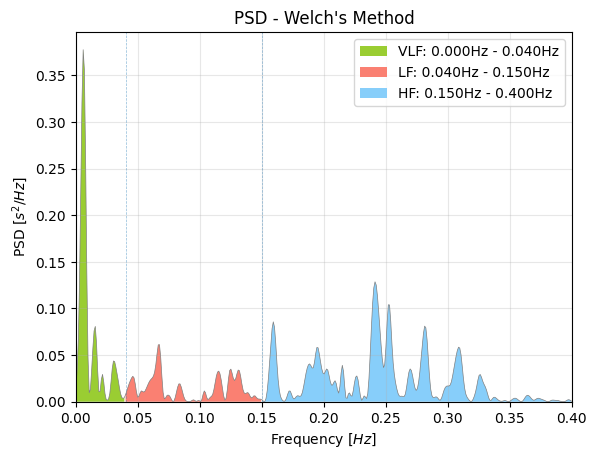

ReturnTuple(fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(np.float64(0.005859375), np.float64(0.0673828125), np.float64(0.2412109375)), fft_abs=(np.float64(2660.7682014296), np.float64(1561.5567256403751), np.float64(5337.081162110837)), fft_rel=(np.float64(27.834032539333343), np.float64(16.335290195566866), np.float64(55.830677265099794)), fft_log=(7.88637015761169, 7.353438503722842, 8.582434183658979), fft_norm=(np.float64(22.63572535692846), np.float64(77.36427464307154)), fft_ratio=np.float64(0.29258628044224333), fft_total=np.float64(9559.406089180811), fft_plot=<Figure size 640x480 with 1 Axes>, fft_nfft=4096, fft_window='hamming', fft_resampling_frequency=4, fft_interpolation='cubic')


In [53]:
# Import packages
import numpy as np
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = pyhrv.utils.load_sample_nni()

# Compute the PSD and frequency domain parameters 
result = fd.welch_psd(nni=nni, show_param=False) # param=Trueとすると、解析結果表示

# Access peak frequencies using the key 'fft_peak'
#print(result['fft_peak'])
print(result)

In [54]:
import pyhrv
import pyhrv.time_domain as td
import numpy as np

# テストデータの作成（実際のRR間隔データの代わり）
rr_intervals = np.array([800, 810, 815, 750, 800, 810, 790]) # ミリ秒単位

try:
    # 基本的な時間領域の解析
    results = td.nni_parameters(rr_intervals)
    print("解析成功:")
    print(results)
except Exception as e:
    print("エラーが発生しました:")
    print(e)

解析成功:
ReturnTuple(nni_counter=7, nni_mean=np.float64(796.4285714285714), nni_min=np.float64(750.0), nni_max=np.float64(815.0))
